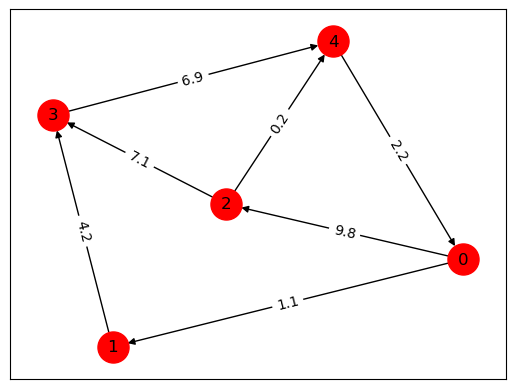

gb.VectorExpression                                         size  dtype
v_562.apply(binary.plus[FP64], right=0.030000000000000006)     5   FP64

"Result"   nvals  size  dtype
gb.Vector      5     5   FP64
-----------------------------
index         0         1         2         3         4
value  0.254213  0.138031  0.138031  0.205973  0.263752

Do expr.new() or other << expr to calculate the expression.


In [3]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import graphblas as gb
from graphblas import Matrix, Vector
from graphblas import dtypes
from graphblas import unary, binary, monoid, semiring

def page_rank(M):
    M << M.apply(unary.one)
    N = M.nrows
    beta = 0.85
    max_iters = 100
    tolerance = 1e-4
    ri = Vector(dtypes.FP32, N)
    rj = Vector(dtypes.FP32, N)
    rj[:] << 1.0 / N
    rdiff = 1
    bd = M.reduce_rowwise(monoid.plus).new(dtype="FP32")
    bd(accum=binary.truediv)[:] << beta
    
    for i in range(max_iters):
        if rdiff <= tolerance:
            break
        ri = rj
        rj = M.T.mxv(ri.ewise_mult(bd, binary.truediv), semiring.plus_second) + (1 - beta) / N
        rdiff = abs(rj - ri).reduce(monoid.plus)
    
    return rj

# Пример с лекции
A = Matrix.from_coo(
    [0, 0, 1, 2, 2, 3, 4],
    [1, 2, 3, 3, 4, 4, 0],
    [1.1, 9.8, 4.2, 7.1, 0.2, 6.9, 2.2],
)

gb.viz.draw(A)
print(page_rank(A))